#                 METRO INTERSTATE VOLUME ANALYSIS

Data Cleaning and Preprocessing

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

After importing the libraries Read the dataset and finding out the info and null values of the dataset

In [99]:
data=pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv")

In [100]:
data.shape

(48204, 9)

In [101]:
data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [40]:
data.tail(3)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
48201,2159,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00
48202,1450,None,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00
48203,954,None,282.12,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 23:00


In [41]:
data.isnull().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              48204 non-null  object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [43]:
data.columns

Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [44]:
data.weather_main.nunique()

11

In [45]:
data.holiday.nunique()

12

In [46]:
label_encoder = LabelEncoder()
categorical_columns = ['weather_main']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              48204 non-null  object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  int64  
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 3.3+ MB


In [102]:
# Convert 'date_time' column to datetime type
data['date_time'] = pd.to_datetime(data['date_time'])

# Predictive model to estimate traffic volume based on weather conditions, temperature, and date-time.

There are different ways to predict the traffic volume based on the weather conditions, temperature and date_time using the LinearRegression,RandomForestRegressor and GradientBoostingRegressor

#RandomForestRegrresor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score,mean_absolute_error

In [ ]:
x = data[['weather_main', 'temp','year', 'month','day_of_week','hour']]
y = data['traffic_volume']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

In [ ]:
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 453899.7488358697
R-squared: 0.8851907949592759
Mean Absolute Error: 383.0715379455797


#Visualize the relationship between weather conditions and traffic volume

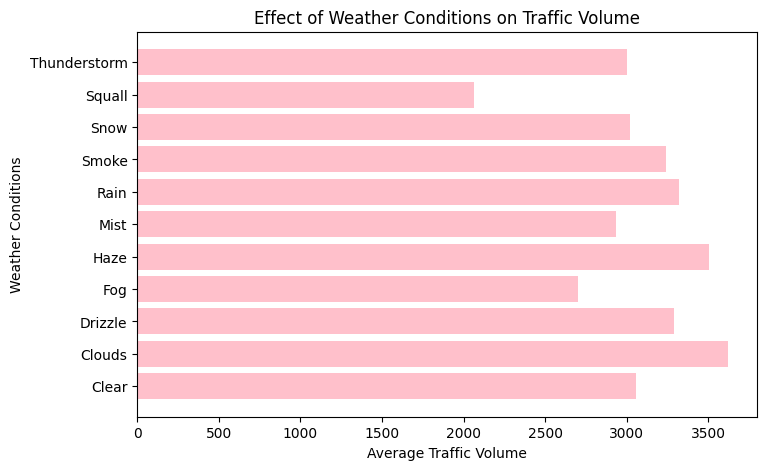

In [ ]:
weather_traffic = data.groupby('weather_main')['traffic_volume'].mean().reset_index()

# Create a bar plot to visualize the relationship between weather conditions and traffic volume
plt.figure(figsize=(8,5))
plt.barh(weather_traffic['weather_main'], weather_traffic['traffic_volume'],color='pink')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Conditions')
plt.title('Effect of Weather Conditions on Traffic Volume')
plt.show()

From above visualization we understood that during the cloudy day we have high traffic volume whereas,the traffic volume is less during the suall weather condition

#Visualizing the impact of holidays on traffic volume

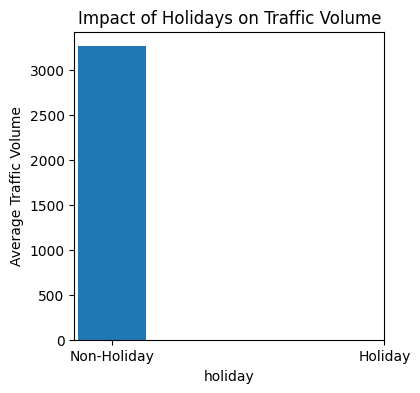

In [ ]:
data['is_holiday'] = data['holiday'] == 'Yes'

# Group the data by 'is_holiday' and calculate the average traffic volume for each group
holiday_traffic = data.groupby('is_holiday')['traffic_volume'].mean().reset_index()

# Create a bar plot to visualize the impact of holidays on traffic volume
plt.figure(figsize=(4,4))
plt.bar(holiday_traffic['is_holiday'], holiday_traffic['traffic_volume'],width=0.25)
plt.ylabel('Average Traffic Volume')
plt.xlabel('holiday')
plt.title('Impact of Holidays on Traffic Volume')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()







From the visualization we understand that the impact of traffic volume  is less compare to the non-holiday

#Seasonal patterns in traffic volume based on weather variations.

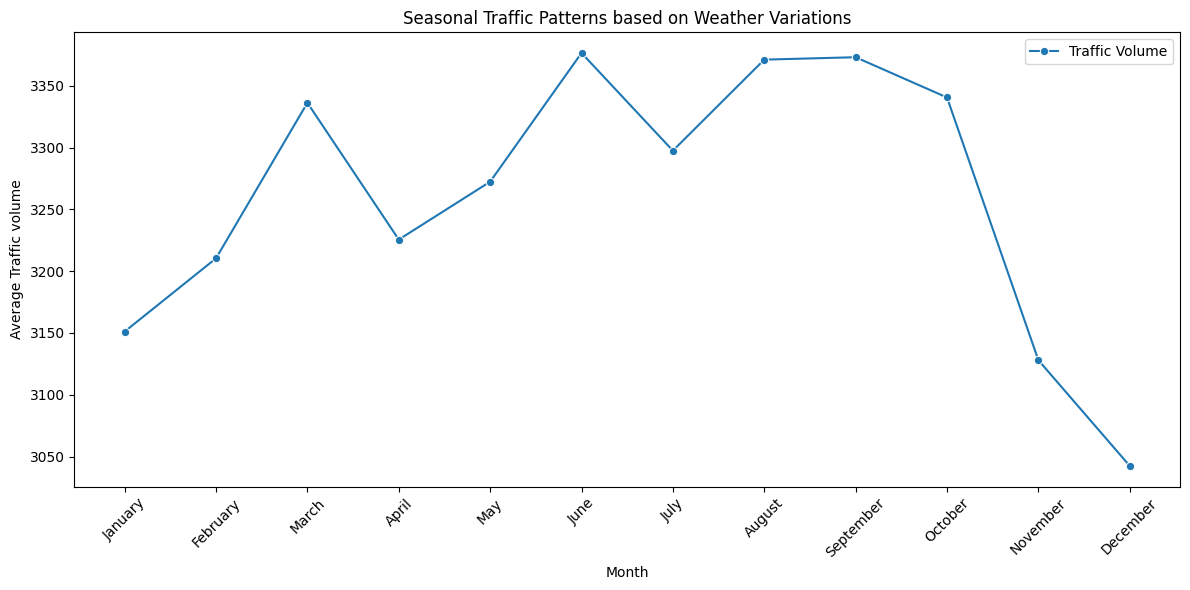

In [ ]:
#Group data by month and calculate the average traffic volume
monthly_avg = data.groupby('month').agg({'traffic_volume': 'mean'}).reset_index()

# Create a mapping for month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: month_names[x - 1])

# Plotting seasonal patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='month_name', y='traffic_volume', marker='o', label='Traffic Volume')
plt.title('Seasonal Traffic Patterns based on Weather Variations')
plt.xlabel('Month')
plt.ylabel('Average Traffic volume')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Visualizing the influence of weather categories on traffic volume

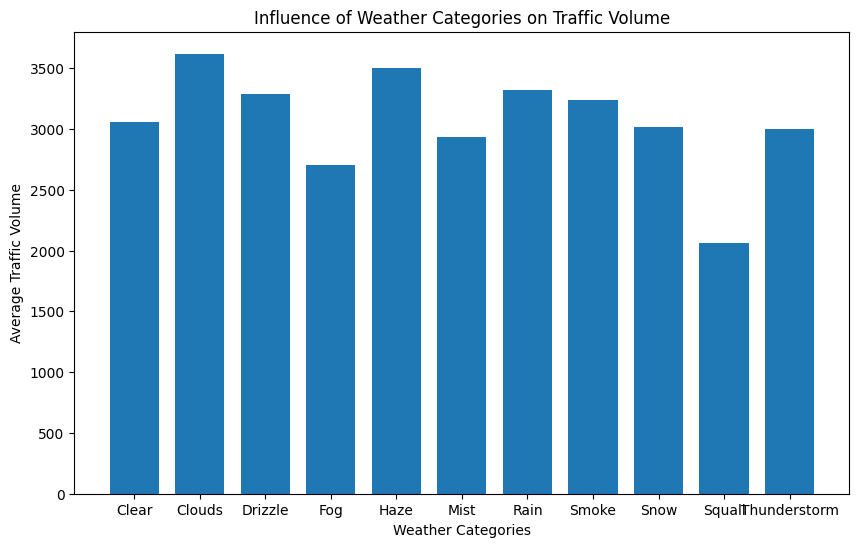

In [ ]:
weather_traffic = data.groupby('weather_main')['traffic_volume'].mean().reset_index()

# Create a bar plot to visualize the influence of weather categories on traffic volume
plt.figure(figsize=(10, 6))
plt.bar(weather_traffic['weather_main'], weather_traffic['traffic_volume'],width=0.75)
plt.xlabel('Weather Categories')
plt.ylabel('Average Traffic Volume')
plt.title('Influence of Weather Categories on Traffic Volume')
plt.show()

From above visualization we understood that during the cloudy day we have high traffic volume whereas,the traffic volume is less during the suall weather condition

#Analyzing traffic volume during different weather conditions to identify the congestion prone periods

In [ ]:
# Function to analyze traffic volume during different weather conditions
def analyze_traffic_congestion(dataset, weather_column='weather_main', volume_column='traffic_volume'):
    congestion_data = {}

    # Group the data by weather conditions and calculate average traffic volume
    grouped_data = dataset.groupby(weather_column)[volume_column].mean()

    # Extract the weather conditions and corresponding average traffic volume
    weather_conditions = grouped_data.index
    avg_traffic_volume = grouped_data.values

    # Create a dictionary to store the weather conditions and average traffic volume
    for weather, volume in zip(weather_conditions, avg_traffic_volume):
        congestion_data[weather] = volume

    return congestion_data



In [ ]:
# Plot the traffic congestion data
def plot_congestion_data(congestion_data):
    plt.figure(figsize=(10, 6))
    plt.bar(congestion_data.keys(), congestion_data.values(),width=0.75,color='grey')
    plt.xlabel('Weather Conditions')
    plt.ylabel('Average Traffic Volume')
    plt.title('Traffic Congestion Analysis')
    plt.xticks(rotation=45)
    plt.show()

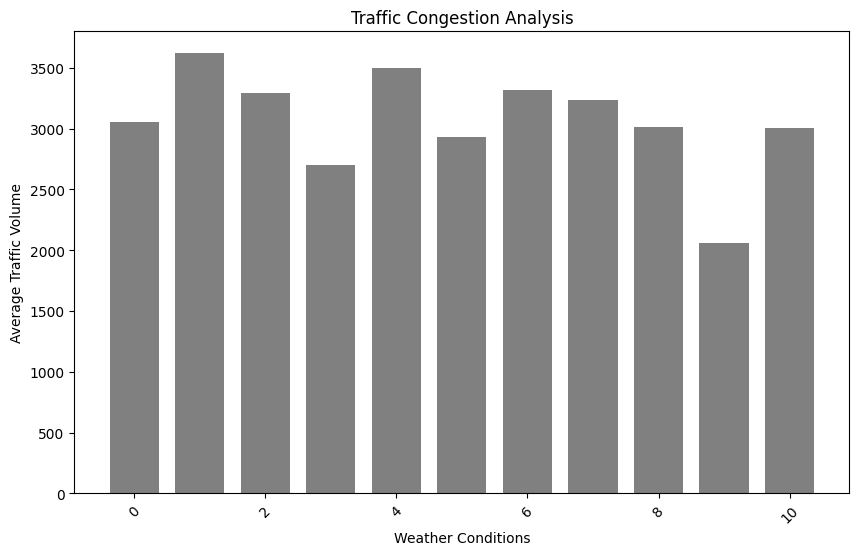

In [ ]:

if __name__ == "__main__":
    # Call the functions to analyze and plot the data
    congestion_data = analyze_traffic_congestion(data)
    plot_congestion_data(congestion_data)

In this we need to analyize the relation between the weather conditons and the average traffic volume and we identified that the congestion prone period is squall and fog.Comparing among both the weather conditions traffic volume is bit higher than the squall

#Study the impact of detailed weather descriptions on traffic volume.

In [ ]:
weather_traffic = data.groupby('weather_description')['traffic_volume'].mean().reset_index()

# Sort the data by average traffic volume in descending order to identify congestion-prone periods
weather_traffic = weather_traffic.sort_values(by='traffic_volume')

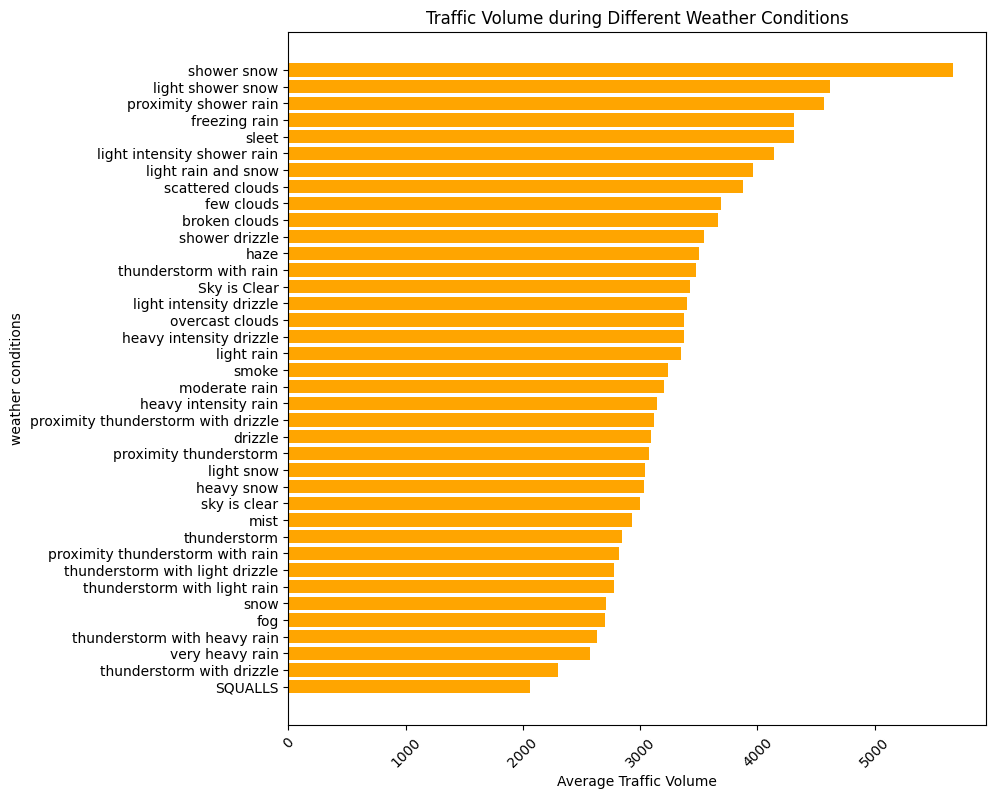

In [ ]:
# Create a bar plot to visualize traffic volume during different weather conditions
plt.figure(figsize=(9, 9))
plt.barh(weather_traffic['weather_description'], weather_traffic['traffic_volume'],color='orange')
plt.xlabel('Average Traffic Volume')
plt.ylabel('weather conditions')
plt.title('Traffic Volume during Different Weather Conditions')
plt.xticks(rotation=45)
plt.show()

#Relationship between cloud cover and traffic volume.

In [ ]:
cloud_traffic = data.groupby('clouds_all')['traffic_volume'].mean().reset_index()

# Sort the data by average traffic volume in ascending order
cloud_traffic = cloud_traffic.sort_values(by='traffic_volume')

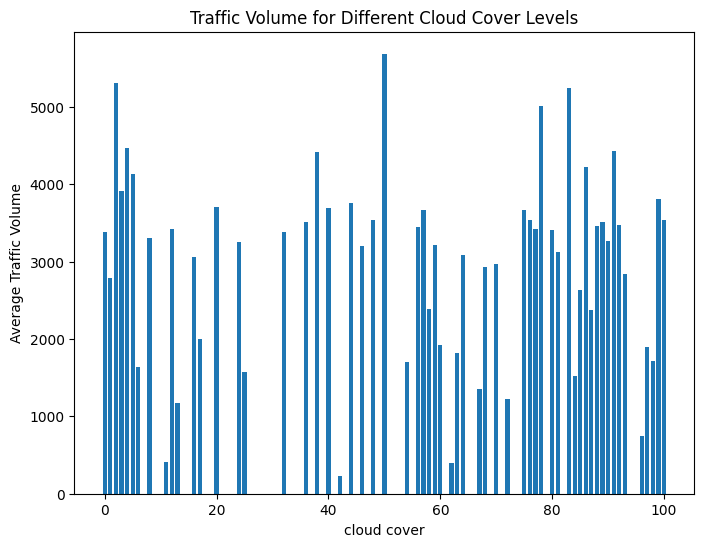

In [ ]:
# Create a bar plot to visualize traffic volume for different cloud cover levels
plt.figure(figsize=(8,6))
plt.bar(cloud_traffic['clouds_all'], cloud_traffic['traffic_volume'],width=0.75)
plt.xlabel('cloud cover')
plt.ylabel('Average Traffic Volume')
plt.title('Traffic Volume for Different Cloud Cover Levels')
plt.show()

#Analyze how temperature variations affect traffic patterns.

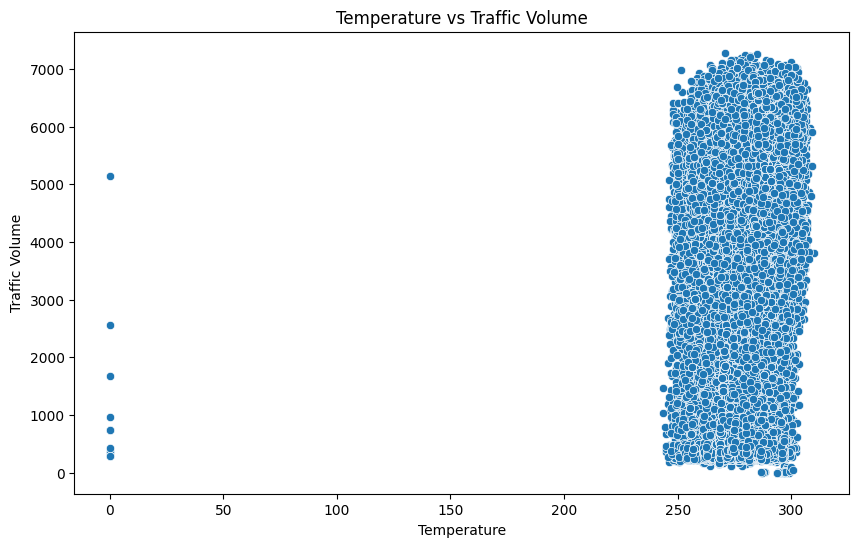

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='traffic_volume', data=data)
plt.title(f"Temperature vs Traffic Volume")
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.show()

#Conduct time series analysis to understand traffic volume trends over time

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [104]:
# Set 'date_time' as the index
data.set_index('date_time', inplace=True)

In [105]:
# Resample the data to daily frequency
daily_data = data['traffic_volume'].resample('D').sum()

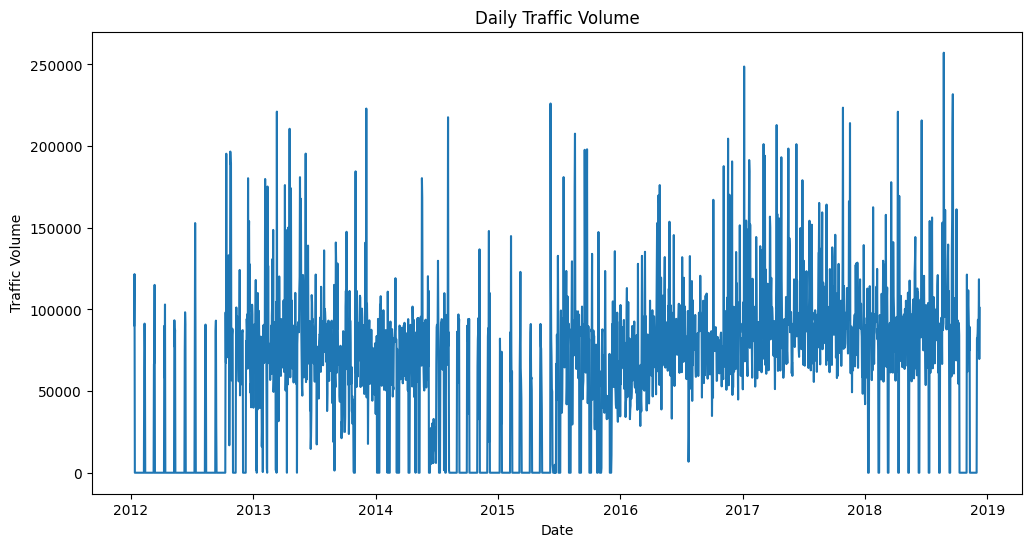

In [106]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_data)
plt.title("Daily Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.show()

<Figure size 1200x1000 with 0 Axes>

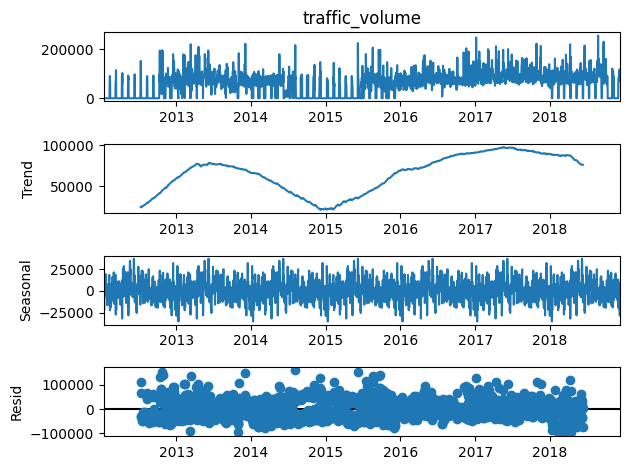

In [107]:
# Perform seasonal decomposition
result = seasonal_decompose(daily_data, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
result.plot()
plt.show()


#Check for stationarity

In [108]:

# Check for stationarity using Dickey-Fuller test
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

test_stationarity(daily_data)

ADF Statistic: -3.161134661386246
p-value: 0.022347487693845303
Critical Values: {'1%': -3.4329715599546646, '5%': -2.862698190651408, '10%': -2.567386549839784}


In [109]:
differenced_data = daily_data.diff(periods=7).dropna()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

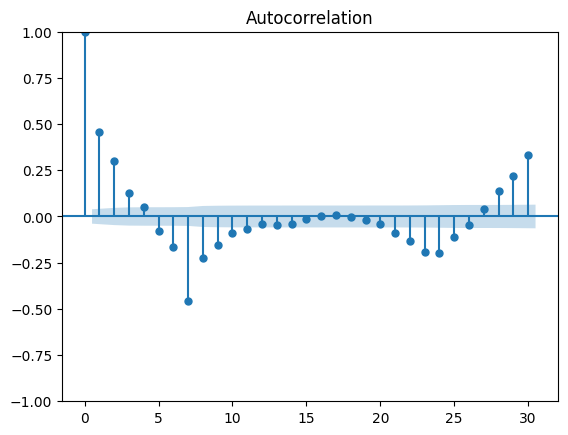

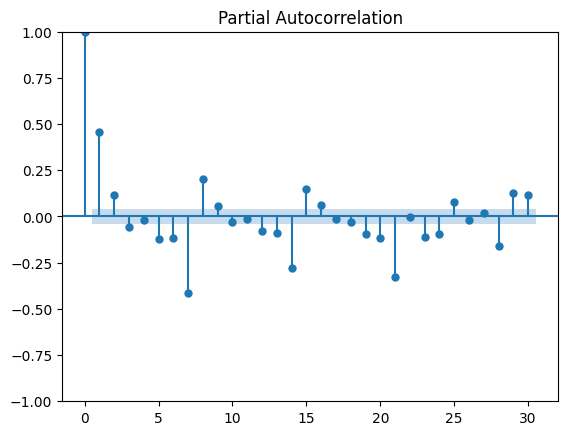

In [110]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(differenced_data, lags=30, alpha=0.05)
plot_pacf(differenced_data, lags=30, alpha=0.05)
plt.show()

In [112]:
# Build ARIMA model
model = ARIMA(daily_data, order=(7, 1, 7))
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#**FORECASTING THE DATA**

In [115]:
# Forecast traffic volume for the next 30 days
forecast_steps = 30
forecast = fit_model.forecast(steps=forecast_steps)
stderr=fit_model.forecast(steps=forecast_steps)
conf_int=fit_model.forecast(steps=forecast_steps)

# Create date range for the forecast
forecast_index = pd.date_range(start=daily_data.index[-1], periods=forecast_steps+1, closed='right')

<ipython-input-115-6330e08793f8>:8: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=daily_data.index[-1], periods=forecast_steps+1, closed='right')


In [116]:

# Differencing to achieve stationarity
differenced_data = daily_data.diff(periods=7).dropna()

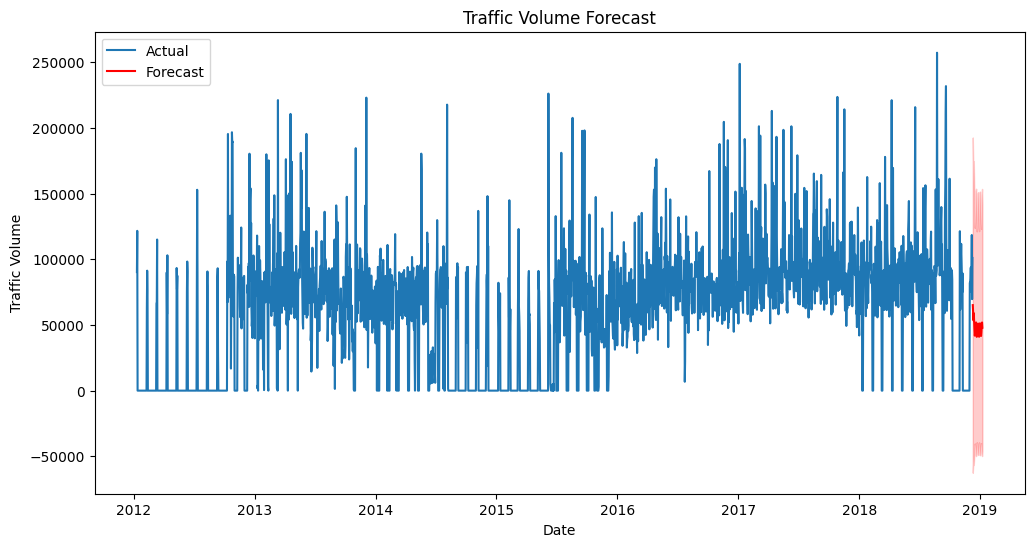

In [118]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Actual')
plt.plot(forecast_index[:], forecast, label='Forecast', color='red')
plt.fill_between(forecast_index[:], forecast - 1.96 * stderr, forecast + 1.96 * stderr, color='r', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Forecast')
plt.legend()
plt.show()


By the above visualization and forecasting we can understand the traffic volume in different conditions like weather,timing ,etc.
We have forecasted the data for the future thirty days and We also applied RandomForestReggressor for predicting the traffic volume.
We also identified that the congestion prone period is squall and fog.Comparing among both the weather conditions traffic volume is bit higher than the squall